In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('data_new.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,1.0,1.0,2013.0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753.0,86.11,420.0,12016.20,3781.40
1,1.0,1.0,2014.0,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753.0,88.74,398.0,11741.00,3749.05
2,1.0,1.0,2015.0,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206.0,88.72,385.0,19762.05,3459.40
3,1.0,1.0,2016.0,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484.0,90.93,373.0,21984.62,3514.65
4,1.0,1.0,2017.0,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471.0,90.36,363.0,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92.0,113437.0,2015.0,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769.0,52.45,838.0,12394.02,6790.05
2560,92.0,113437.0,2016.0,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517.0,57.76,685.0,10754.50,6939.50
2561,92.0,113437.0,2017.0,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339.0,62.02,610.0,67191.50,7191.85
2562,77.0,120111.0,2016.0,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673.0,65.94,1063.0,101059.41,13375.10


In [3]:
df_old = pd.read_csv('data.csv', sep = ';')
df_old

,federal_district,federal_district_short,region_code,region_name,okato,id,name,name_short,year,e1,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2013,61.88,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,3781.40
1,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2014,55.81,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,3749.05
2,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2015,57.45,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,3459.40
3,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2016,59.44,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2017,60.15,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2015,0.00,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769,52.45,838,12394.02,6790.05
2560,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2016,59.70,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517,57.76,685,10754.50,6939.50
2561,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2017,59.57,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339,62.02,610,67191.50,7191.85
2562,Центральный федеральный округ,ЦФО,77,г. Москва,45000000000,120111,Федеральное государственное автономное образов...,"Московский политехнический университет, Москов...",2016,63.77,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673,65.94,1063,101059.41,13375.10


In [4]:
df_old = df_old[['federal_district_short','region_name', 'id', 'name_short']]
df_old

,federal_district_short,region_name,id,name_short
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
1,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
2,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
...,...,...,...,...
2559,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2561,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов..."


In [5]:
sum(df.isna().sum())

0

In [6]:
df.describe().iloc[:, 3:]

,e1,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2.564000e+03,2.564000e+03,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000
mean,63.551443,228.328947,5.641502,2424.363781,126.754275,75.031636,20.574863,64.698647,65.125171,86.470968,835.436619,1.472260e+05,1.227662e+06,67230.093019,68.315967,447.676287,6.512162e+04,4479.111466
std,11.759901,344.387781,5.901523,1487.830099,63.298523,23.228551,26.964336,15.597322,226.988421,270.999805,1240.126771,3.431699e+05,1.702346e+06,58609.916299,16.590214,469.704762,1.487524e+05,4241.805360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.905648e+03,448.000000,0.000000,0.000000,0.000000e+00,7.300000
25%,58.407500,75.545000,1.730000,1612.442500,107.792500,70.000000,3.940000,59.187500,1.578825,3.753225,151.468725,1.609080e+04,3.751277e+05,28179.500000,63.705000,169.750000,3.000320e+03,1521.462500
50%,63.630000,124.167500,3.920000,2009.697500,145.370000,80.000000,5.080000,65.620000,9.768900,17.920800,438.174100,3.863985e+04,7.093066e+05,52789.750000,72.460000,338.000000,1.629617e+04,3442.775000
75%,69.712500,228.937500,7.570000,2746.067500,169.802500,90.000000,37.442500,72.367500,35.864900,58.836900,966.460800,1.011163e+05,1.258382e+06,89577.750000,78.622500,550.000000,4.753475e+04,5830.850000
max,100.000000,4591.210000,100.000000,19777.220000,390.650000,100.000000,100.000000,100.000000,3592.294200,3993.951500,15278.085200,3.771453e+06,1.496202e+07,494377.000000,100.000000,5128.000000,1.479023e+06,33241.700000


In [ ]:
def info_from_id(Id):
    

# Добавление новых переменных

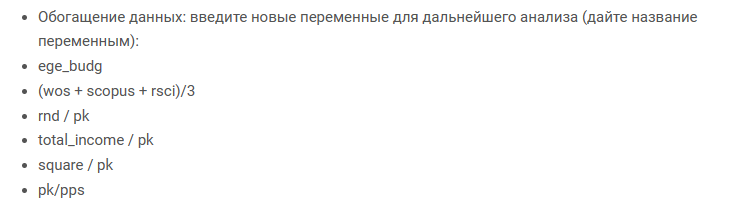

In [7]:
df['pps'] = df['pps'].apply(lambda x: x if x !=0 else 1)
df['pps'].min()

1.0

In [8]:
df['wsr'] = (df['wos'] + df['scopus'] + df['rsci'])/3
df['rnd_pk'] = df['rnd'] / df['pk']
df['ti_pk'] = df['total_income'] / df['pk']
df['sq_pk'] = df['square'] / df['pk']
df['pk_pps'] = df['pk'] / df['pps']
df

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,...,square,phd_share,pps,rnd_private,pk,wsr,rnd_pk,ti_pk,sq_pk,pk_pps
0,1.0,1.0,2013.0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,...,53753.0,86.11,420.0,12016.20,3781.40,118.832000,9.250489,313.060000,14.215106,9.003333
1,1.0,1.0,2014.0,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,...,53753.0,88.74,398.0,11741.00,3749.05,212.465667,9.266241,335.755591,14.337766,9.419724
2,1.0,1.0,2015.0,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,...,51206.0,88.72,385.0,19762.05,3459.40,466.440333,10.334307,344.643869,14.801989,8.985455
3,1.0,1.0,2016.0,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,...,60484.0,90.93,373.0,21984.62,3514.65,494.685033,9.284452,216.341485,17.209110,9.422654
4,1.0,1.0,2017.0,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,...,60471.0,90.36,363.0,27054.39,4179.00,345.334000,9.482197,177.395310,14.470208,11.512397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92.0,113437.0,2015.0,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,...,116769.0,52.45,838.0,12394.02,6790.05,233.634400,11.282347,281.838028,17.197075,8.102685
2560,92.0,113437.0,2016.0,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,...,116517.0,57.76,685.0,10754.50,6939.50,376.361833,13.276980,232.366208,16.790403,10.130657
2561,92.0,113437.0,2017.0,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,...,117339.0,62.02,610.0,67191.50,7191.85,475.169667,12.424592,231.645474,16.315552,11.789918
2562,77.0,120111.0,2016.0,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,...,194673.0,65.94,1063.0,101059.41,13375.10,951.172400,33.997750,288.673670,14.554882,12.582408


In [9]:
var = df.drop(['region_code', 'id', 'year'], axis = 1)

In [10]:
def info_rating(df):
    coef_var = df.std() / df.mean() * 100
    return coef_var

result = pd.DataFrame()
result['coef_var'] = info_rating(var)
result

,coef_var
e1,18.504538
e2,150.829663
e3,104.609079
e4,61.369919
e5,49.937979
e6,30.958342
e8,131.054752
ege_budg,24.107649
wos,348.541764
scopus,313.399760


# Отбор переменных для кластерного анализа

оставляем e1-e8

ege_budg убираем

wos scopus rsci убираем; вместо них берем wsr

вместо pk и  pps берем pk_pps

rnd и rnd_private пока оба оставим

точно убираем ti_pk, sq_pk,end_pk

In [46]:
df.columns

Index(['region_code', 'id', 'year', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e8',
       'ege_budg', 'wos', 'scopus', 'rsci', 'rnd', 'total_income', 'square',
       'phd_share', 'pps', 'rnd_private', 'pk', 'wsr', 'rnd_pk', 'ti_pk',
       'sq_pk', 'pk_pps'],
      dtype='object')

In [9]:
df_copy = df[['region_code', 'id', 'year','e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e8', 
                        'wsr', 'rnd', 'total_income', 'square', 'phd_share','rnd_private', 'pk_pps']]
df_copy

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,wsr,rnd,total_income,square,phd_share,rnd_private,pk_pps
0,1.0,1.0,2013.0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,118.832000,34979.8,1183805.084,53753.0,86.11,12016.20,9.003333
1,1.0,1.0,2014.0,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,212.465667,34739.6,1258764.500,53753.0,88.74,11741.00,9.419724
2,1.0,1.0,2015.0,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,466.440333,35750.5,1192261.000,51206.0,88.72,19762.05,8.985455
3,1.0,1.0,2016.0,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,494.685033,32631.6,760364.600,60484.0,90.93,21984.62,9.422654
4,1.0,1.0,2017.0,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,345.334000,39626.1,741335.000,60471.0,90.36,27054.39,11.512397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92.0,113437.0,2015.0,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,233.634400,76607.7,1913694.300,116769.0,52.45,12394.02,8.102685
2560,92.0,113437.0,2016.0,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,376.361833,92135.6,1612505.300,116517.0,57.76,10754.50,10.130657
2561,92.0,113437.0,2017.0,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,475.169667,89355.8,1665959.500,117339.0,62.02,67191.50,11.789918
2562,77.0,120111.0,2016.0,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,951.172400,454723.3,3861039.200,194673.0,65.94,101059.41,12.582408


In [49]:
len(df_copy['id'].unique())

565

In [11]:
df_cluster = df[['region_code', 'year','e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e8', 
                        'wsr', 'rnd', 'total_income', 'square', 'phd_share','rnd_private', 'pk_pps']]
df_cluster

,region_code,year,e1,e2,e3,e4,e5,e6,e8,wsr,rnd,total_income,square,phd_share,rnd_private,pk_pps
0,1.0,2013.0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,118.832000,34979.8,1183805.084,53753.0,86.11,12016.20,9.003333
1,1.0,2014.0,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,212.465667,34739.6,1258764.500,53753.0,88.74,11741.00,9.419724
2,1.0,2015.0,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,466.440333,35750.5,1192261.000,51206.0,88.72,19762.05,8.985455
3,1.0,2016.0,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,494.685033,32631.6,760364.600,60484.0,90.93,21984.62,9.422654
4,1.0,2017.0,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,345.334000,39626.1,741335.000,60471.0,90.36,27054.39,11.512397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92.0,2015.0,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,233.634400,76607.7,1913694.300,116769.0,52.45,12394.02,8.102685
2560,92.0,2016.0,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,376.361833,92135.6,1612505.300,116517.0,57.76,10754.50,10.130657
2561,92.0,2017.0,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,475.169667,89355.8,1665959.500,117339.0,62.02,67191.50,11.789918
2562,77.0,2016.0,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,951.172400,454723.3,3861039.200,194673.0,65.94,101059.41,12.582408


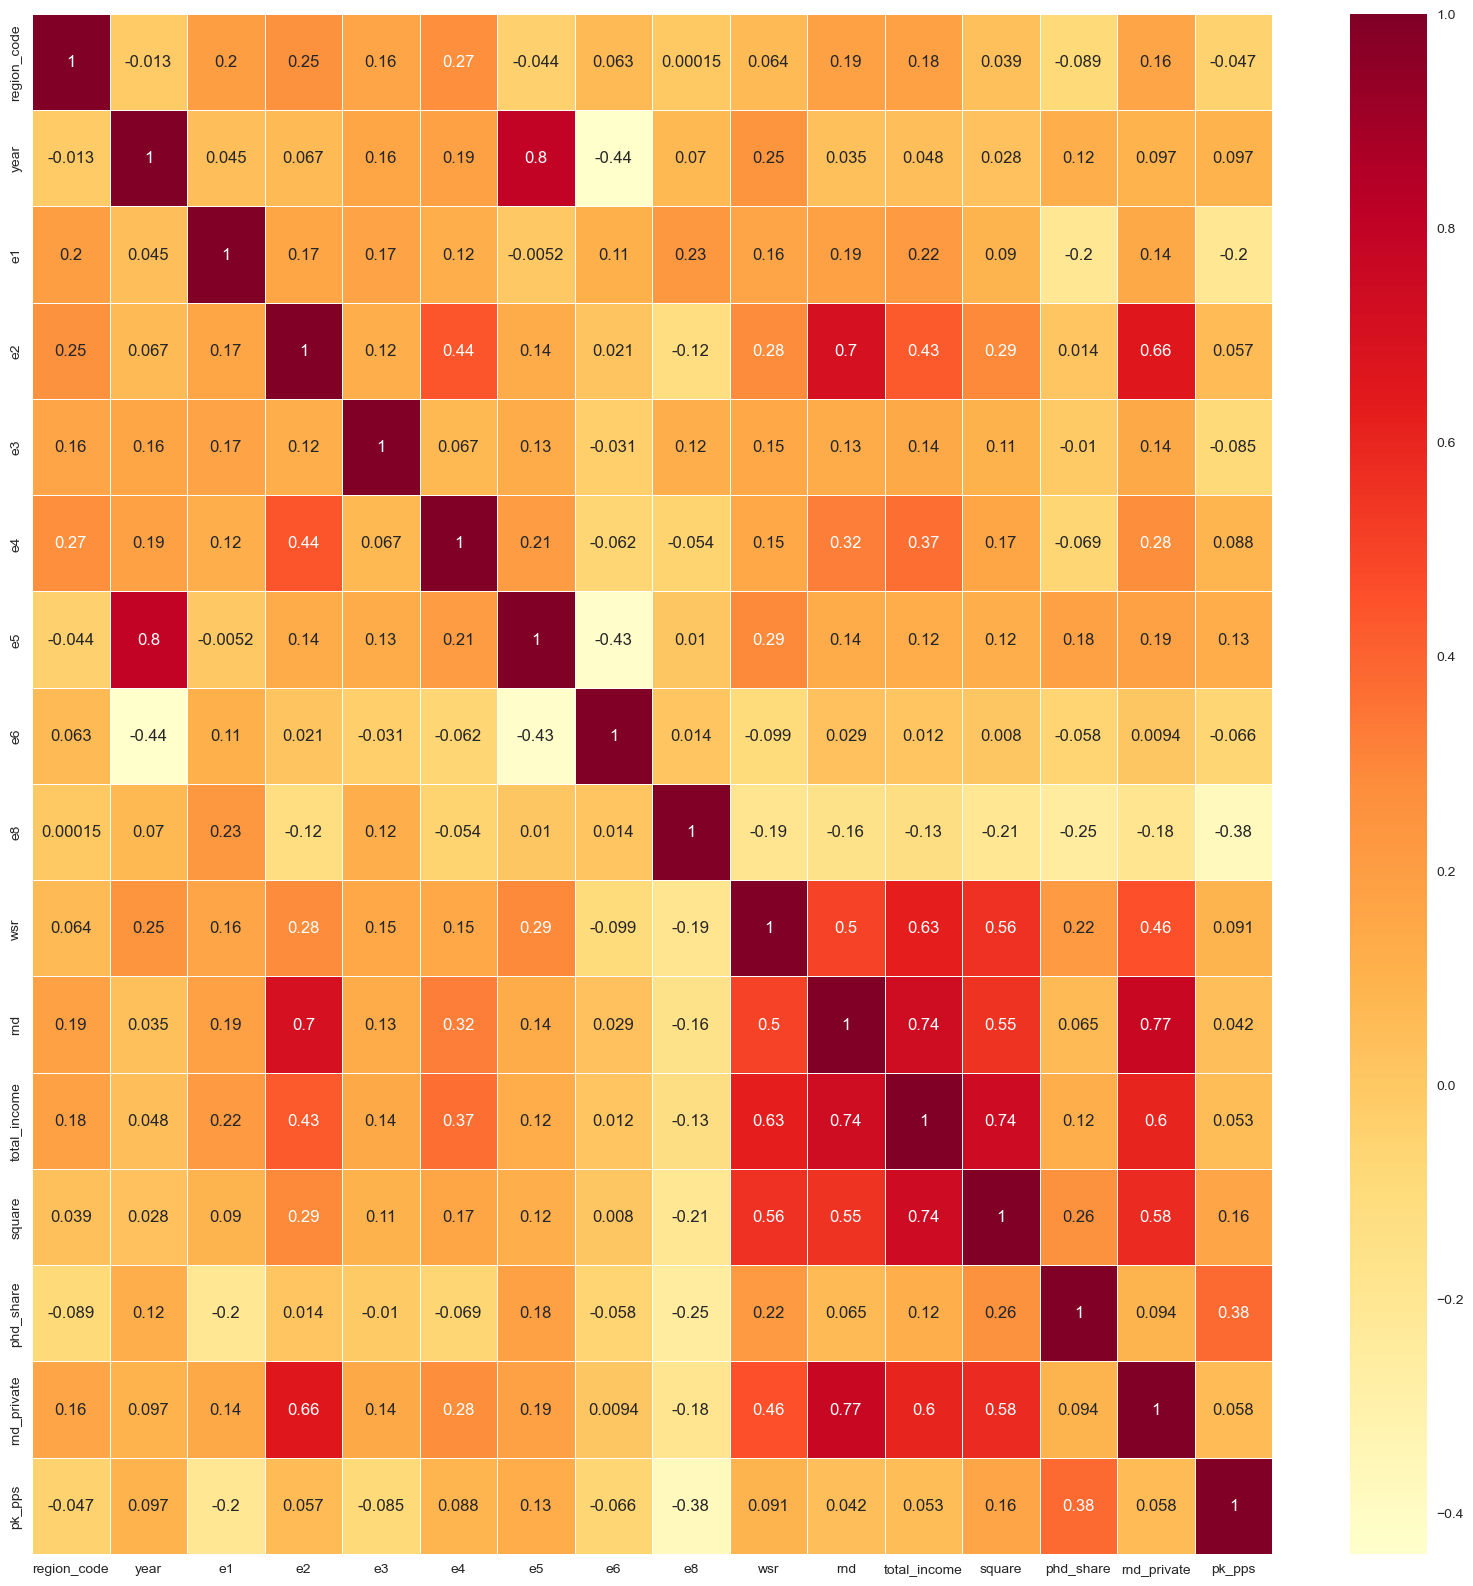

In [51]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_cluster.corr() , annot=True, cmap='YlOrRd', linewidths=0.5)
plt.show()

# Выявление ложной корреляции

Будем считать, что переменные сильно связаны, если коэффицент корелляции между ними <=0.7

С помощью t-статистики Стьюдента проверим на значимость эти коэф-ы

In [13]:
df_corr = df[['year', 'e5', 'e2', 'rnd', 'rnd_private', 'total_income', 'square']]
df_corr

,year,e5,e2,rnd,rnd_private,total_income,square
0,2013.0,14.22,75.55,34979.8,12016.20,1183805.084,53753.0
1,2014.0,142.78,76.32,34739.6,11741.00,1258764.500,53753.0
2,2015.0,166.81,86.40,35750.5,19762.05,1192261.000,51206.0
3,2016.0,146.02,84.80,32631.6,21984.62,760364.600,60484.0
4,2017.0,158.43,109.27,39626.1,27054.39,741335.000,60471.0
...,...,...,...,...,...,...,...
2559,2015.0,177.96,84.99,76607.7,12394.02,1913694.300,116769.0
2560,2016.0,154.15,126.14,92135.6,10754.50,1612505.300,116517.0
2561,2017.0,162.82,129.54,89355.8,67191.50,1665959.500,117339.0
2562,2016.0,161.80,431.18,454723.3,101059.41,3861039.200,194673.0


In [14]:
df_corr.corr()

,year,e5,e2,rnd,rnd_private,total_income,square
year,1.000000,0.795268,0.066549,0.035330,0.096737,0.047570,0.028391
e5,0.795268,1.000000,0.138717,0.138741,0.188300,0.124165,0.116698
e2,0.066549,0.138717,1.000000,0.702502,0.659976,0.432128,0.290158
rnd,0.035330,0.138741,0.702502,1.000000,0.765826,0.739544,0.551497
rnd_private,0.096737,0.188300,0.659976,0.765826,1.000000,0.602106,0.583634
total_income,0.047570,0.124165,0.432128,0.739544,0.602106,1.000000,0.743370
square,0.028391,0.116698,0.290158,0.551497,0.583634,0.743370,1.000000


In [15]:
def check_corr_coef(x, y):
    n = df.shape[0]
    rho = np.corrcoef(x,y)[0][1]
    t_r = rho/np.sqrt(1-rho**2)*np.sqrt(n-2)
    T = t(n-2)
    alpha = 0.05
    if abs(t_r) > T.isf(alpha/2):
        print(rho)
        print('коэф корреляции значим')
    else:
        print(rho)
        print('коэф корреляции не значим')

In [16]:
check_corr_coef(df['year'], df['e5'])

0.795268180577886
коэф корреляции значим


ЗП зависит от года

In [17]:
check_corr_coef(df['e2'], df['rnd'])

0.7025015788189983
коэф корреляции значим


Чем больше НИОКР будет выполнено, тем больше денег получено

In [18]:
check_corr_coef(df['rnd_private'], df['rnd'])

0.7658264358316753
коэф корреляции значим


Чем больше НИОКР будет выполнено, тем больше денег получено

In [19]:
check_corr_coef(df['rnd'], df['total_income'])

0.7395440662004802
коэф корреляции значим


In [20]:
check_corr_coef(df['total_income'], df['square'])

0.7433701650155226
коэф корреляции значим


# Стандартизация 

In [12]:
def standardize_dataframe(df):
    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_standardized
df_cluster = standardize_dataframe(df_cluster)
df_cluster

,region_code,year,e1,e2,e3,e4,e5,e6,e8,wsr,rnd,total_income,square,phd_share,rnd_private,pk_pps
0,-2.066362,-1.376626,-0.142158,-0.443711,0.167532,0.089024,-1.778181,0.836736,-0.506874,-0.405673,-0.327150,-0.025768,-0.229990,1.072771,-0.357075,-0.279026
1,-2.066362,-0.672523,-0.658420,-0.441475,0.598013,0.229027,0.253226,-0.862540,-0.491295,-0.224948,-0.327850,0.018274,-0.229990,1.231329,-0.358925,-0.161522
2,-2.066362,0.031580,-0.518936,-0.412200,1.150520,0.307142,0.632930,-0.862540,-0.499827,0.265257,-0.324904,-0.020800,-0.273456,1.230124,-0.304993,-0.284071
3,-2.066362,0.735684,-0.349684,-0.416847,1.730145,-0.301413,0.304422,-3.230777,-0.512809,0.319773,-0.333994,-0.274556,-0.115124,1.363361,-0.290048,-0.160695
4,-2.066362,1.439787,-0.289297,-0.345779,3.196154,-0.255552,0.500516,-0.431951,-0.549902,0.031506,-0.313608,-0.285736,-0.115346,1.328996,-0.255960,0.429022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,1.701235,0.031580,-5.405134,-0.416295,0.321759,-0.202579,0.809114,-0.733363,-0.592560,-0.184089,-0.205822,0.403071,0.845396,-0.956531,-0.354535,-0.533185
2560,1.701235,0.735684,-0.327570,-0.296784,0.094655,-0.145753,0.432886,-3.230777,-0.615558,0.091393,-0.160565,0.226110,0.841095,-0.636401,-0.365559,0.039101
2561,1.701235,1.439787,-0.338627,-0.286910,-0.003644,-0.006207,0.569883,-0.862540,-0.610364,0.282106,-0.168667,0.257517,0.855123,-0.379573,0.013918,0.507337
2562,1.080202,0.735684,0.018589,0.589134,0.540389,0.831424,0.553766,-0.001362,-0.665263,1.200853,0.896225,1.547212,2.174850,-0.143243,0.241642,0.730975


# Кластеризация

Что я хочу получить?

Есть n вузов. Я должна разбить их на кластеры (кол-во кластеров неизвестно). В одном кластере характеристики вузов должны быть схожи

**Если я кластеризую по всем признакам, что я получу?**

У меня будут топовые (крупные, известные (?) вузы, у которых большая площадь, высокий доход, хорошие показатели трудоустройства/публикаций/общий уровень студентов/... менее топовые и совсем не топовые

**Если разбивать признаки на категории?**

Призанки, связанные с доходами/научной деятельностью...

Таким образом вузы будут поделены более детально

# PCA (Метод главных компонент)
У нас много признаков, присутствует мультиколлинеарность, поэтому кластеризация может быть затруднительна

PCA помогает сократить количество признаков, при этом минимизирует потерю информации

https://habr.com/ru/articles/304214/

**Что разобрать**

explained_variance, explained_variance_ratio, веса, biplot

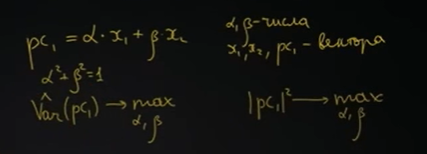

In [13]:
pca = PCA(n_components = 10)
ds_pca = pca.fit_transform(df_cluster)
ds_pca = pd.DataFrame(ds_pca)
ds_pca.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
ds_pca

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,-1.236820,1.150275,1.861896,-0.890550,-0.157352,0.491328,-0.860289,0.181905,1.049708,0.295214
1,-0.616234,-1.159324,1.008738,-0.759722,-0.358045,0.941690,-0.278775,0.302099,0.985621,0.557513
2,-0.214895,-1.687373,0.450053,-0.992181,-0.023277,1.069383,-0.338971,0.112305,1.092423,0.153133
3,-0.144665,-2.957279,-0.066434,-1.342489,0.022843,1.603221,0.815597,-0.430137,0.845583,1.741898
4,0.029398,-2.300928,-0.078239,-1.399254,1.675716,2.097031,-0.965723,-0.527490,1.590245,0.053906
...,...,...,...,...,...,...,...,...,...,...
2559,-0.261082,-1.304797,1.107201,1.219129,-0.481349,2.495883,3.249757,2.688484,-0.017157,-1.811004
2560,0.562126,-1.677422,-0.836755,0.596314,0.074963,-0.181264,3.038747,-0.161760,-0.375161,1.288552
2561,0.886289,-1.253053,-0.391880,0.629517,0.675124,-0.563899,1.485838,-0.038616,-0.358820,-0.310151
2562,3.137831,-0.264171,0.198205,0.019547,0.714951,-0.647410,0.851612,0.349677,0.663314,-0.369311


In [14]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [16]:
prop_var, np.sum(prop_var)

(array([0.27352606, 0.13969162, 0.12061642, 0.0770617 , 0.06192785,
        0.05094206, 0.04733333, 0.04217443, 0.04150729, 0.03697731]),
 0.8917580722508599)

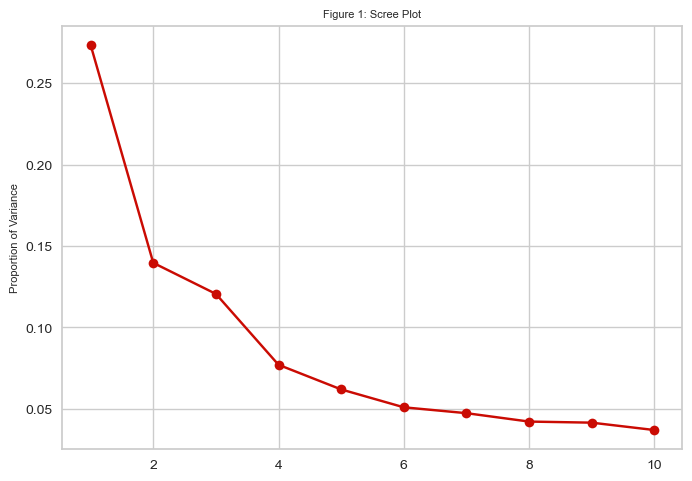

In [17]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [19]:
pca = PCA(n_components = 2)
ds_pca = pca.fit_transform(df_cluster)
ds_pca = pd.DataFrame(ds_pca)
ds_pca.columns = ['P1', 'P2']
ds_pca

,P1,P2
0,-1.236826,1.150291
1,-0.616253,-1.159321
2,-0.214911,-1.687368
3,-0.144656,-2.957276
4,0.029400,-2.300904
...,...,...
2559,-0.261080,-1.304797
2560,0.562152,-1.677436
2561,0.886307,-1.253055
2562,3.137857,-0.264176


In [22]:
ds_pca.corr().iloc[0][1]

2.397924937487331e-17

In [48]:
pca.n_components_

2

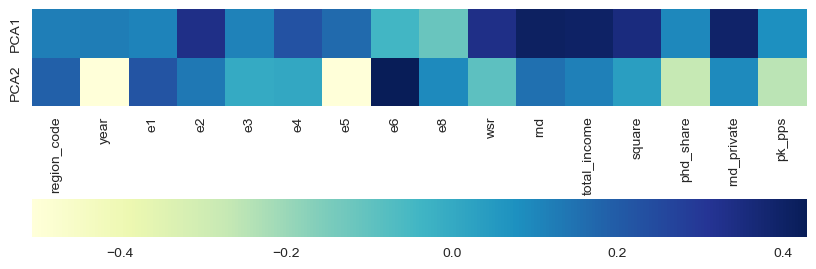

In [33]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1, pca.n_components_+1)],
                 xticklabels=list(df_cluster.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [55]:
print("Weights of old variables in principal components:")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for j, variable in enumerate(df_cluster.columns):
        print(f"{variable}: {component[j]}")
    print()

Weights of old variables in principal components:
Principal Component 1:
region_code: 0.12118718655973107
year: 0.12228577252126158
e1: 0.10933462537211766
e2: 0.33546668197088847
e3: 0.11068957879331956
e4: 0.2272774115932913
e5: 0.1672272369220407
e6: -0.041266976961548296
e8: -0.11418183707495656
wsr: 0.33696647685784414
rnd: 0.41021409556105487
total_income: 0.40275432291035484
square: 0.35206711980684907
phd_share: 0.09930760178669797
rnd_private: 0.3938978481068202
pk_pps: 0.0790788541648916

Principal Component 2:
region_code: 0.18796036182193954
year: -0.5054356593075083
e1: 0.22056724145582124
e2: 0.13500813627000668
e3: -2.7485855919486324e-05
e4: 0.0078021448513237324
e5: -0.5069796769081737
e6: 0.4286473837028546
e8: 0.09477966309946537
wsr: -0.09170964842967944
rnd: 0.15149127126532896
total_income: 0.11605962192071843
square: 0.034857873161157536
phd_share: -0.27160696799793105
rnd_private: 0.09593261447253895
pk_pps: -0.25199003369270734



Наиболее важные переменные в первой компоненте - e2, wsr, rnd,total_income, square, rnd_private

Наиболее важные переменные во второй компоненте - year, e5, e6

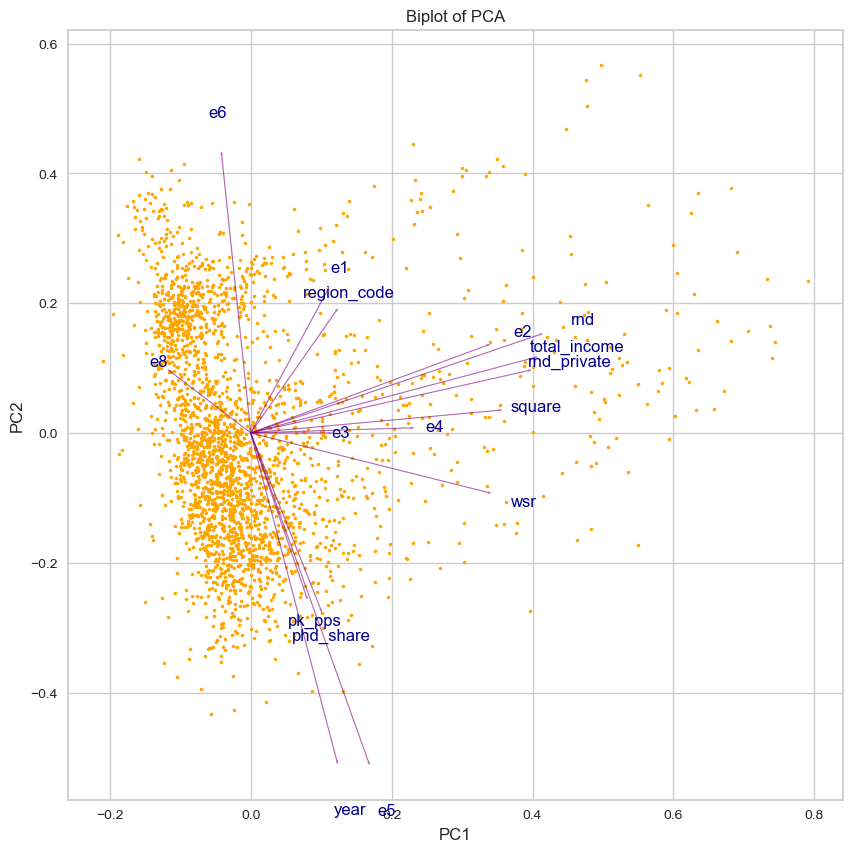

<Figure size 800x550 with 0 Axes>

In [51]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='orange')
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()
    
plt.figure(figsize = (10, 10))
plt.title('Biplot of PCA')
 
biplot(pca.fit_transform(df_cluster), 
       np.transpose(pca.components_), 
       list(df_cluster.columns))

In [52]:
pca.explained_variance_ratio_

array([0.27352606, 0.13969162])

In [24]:
weights = pca.components_
len(weights)

16

In [19]:
weights.shape

(16, 16)

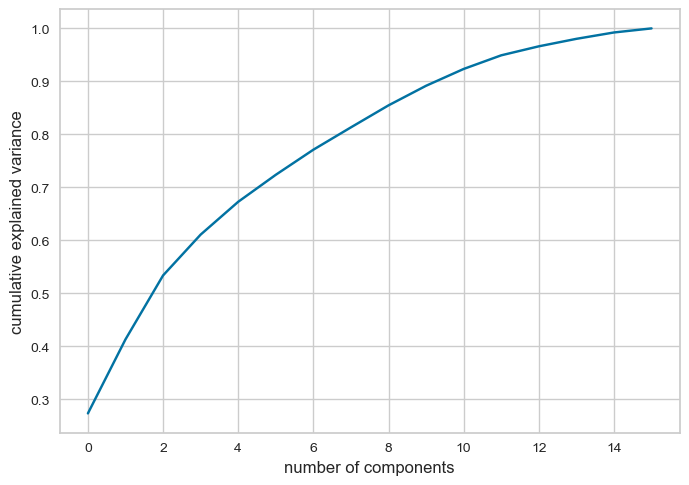

In [17]:
pca = PCA().fit(df_cluster)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [203]:
ds_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
P1,2564.0,0.000000e+00,2.092397,-3.221028,-1.187752,-0.559059,0.366977,12.141990
P2,2564.0,2.216982e-17,1.495305,-3.913414,-1.132194,-0.162051,1.221454,5.129686


In [204]:
#AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Выполняем иерархическую кластеризацию с методом одиночной связи
Z = linkage(ds_pca, method='single')

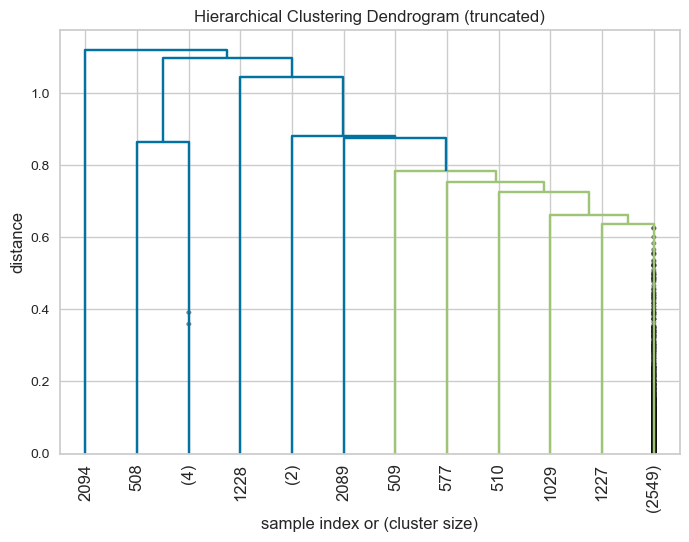

In [205]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# ward

In [206]:
from scipy.cluster.hierarchy import linkage, fcluster

# Построение иерархической кластеризации
Z = linkage(ds_pca, method='ward')

# Определение кластеров с помощью fcluster
threshold = 14 # Пороговое значение для определения аномалий
clusters = fcluster(Z, threshold, criterion='distance')

# Найдем индексы точек, относящихся к аномальным кластерам
anomalies_indices = np.where(clusters > threshold)[0]

print("Найдено аномалий:", len(anomalies_indices))

Найдено аномалий: 611


{'whiskers': [<matplotlib.lines.Line2D at 0x235994d44f0>,
 'caps': [<matplotlib.lines.Line2D at 0x235994d4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x235994d4250>,
 'medians': [<matplotlib.lines.Line2D at 0x235994d4f70>,
 'fliers': [<matplotlib.lines.Line2D at 0x235994d5210>,
 'means': []}

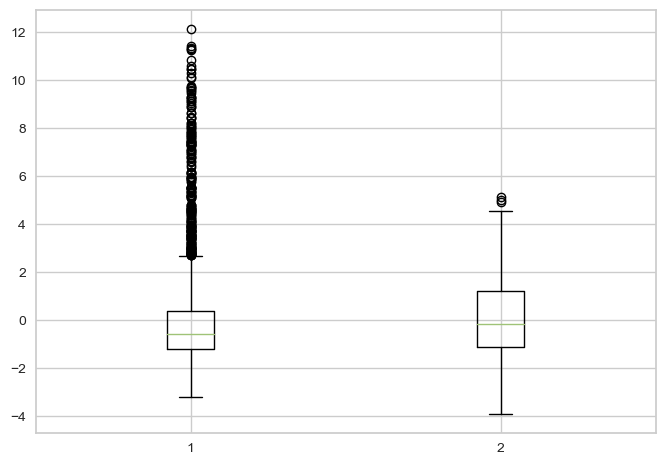

In [144]:
plt.boxplot(ds_pca)

In [208]:
# Удаление аномальных объектов из исходного массива np.array
ds_pca['cl'] = clusters
ds_pca

,P1,P2,cl
0,-1.236858,1.150126,8
1,-0.616229,-1.159222,15
2,-0.214899,-1.687324,15
3,-0.144708,-2.957426,11
4,0.029334,-2.301147,11
...,...,...,...
2559,-0.261094,-1.304681,15
2560,0.562096,-1.677470,12
2561,0.886267,-1.253175,13
2562,3.137762,-0.264254,3


In [209]:
ind = ds_pca[ds_pca['cl'] > 14].index
ind

Int64Index([   1,    2,    6,    7,    8,   21,   22,   23,   26,   27,
            ...
            2523, 2530, 2532, 2533, 2540, 2547, 2549, 2550, 2551, 2559],
           dtype='int64', length=611)

In [210]:
ds_pca = ds_pca[ds_pca['cl'] <= 14]
ds_pca

,P1,P2,cl
0,-1.236858,1.150126,8
3,-0.144708,-2.957426,11
4,0.029334,-2.301147,11
5,-1.664197,1.449593,8
9,-0.561565,-1.924456,11
...,...,...,...
2558,-1.787896,0.610120,14
2560,0.562096,-1.677470,12
2561,0.886267,-1.253175,13
2562,3.137762,-0.264254,3


In [211]:
ds_pca.drop('cl', axis = 1)
ds_pca

,P1,P2,cl
0,-1.236858,1.150126,8
3,-0.144708,-2.957426,11
4,0.029334,-2.301147,11
5,-1.664197,1.449593,8
9,-0.561565,-1.924456,11
...,...,...,...
2558,-1.787896,0.610120,14
2560,0.562096,-1.677470,12
2561,0.886267,-1.253175,13
2562,3.137762,-0.264254,3


In [212]:
df_old = df_old.drop(index = ind)
df_old

,federal_district_short,region_name,id,name_short,agglo_cluster,Kmeans_cluster
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,2,2
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0,1
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0,1
5,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,2,2
9,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,0,1
...,...,...,...,...,...,...
2558,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,2
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,1
2561,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,1
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов...",3,0


In [213]:
df_old = df_old.drop(['agglo_cluster', 'Kmeans_cluster'], axis = 1)
df_old

,federal_district_short,region_name,id,name_short
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»
5,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»
9,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»
...,...,...,...,...
2558,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2561,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов..."


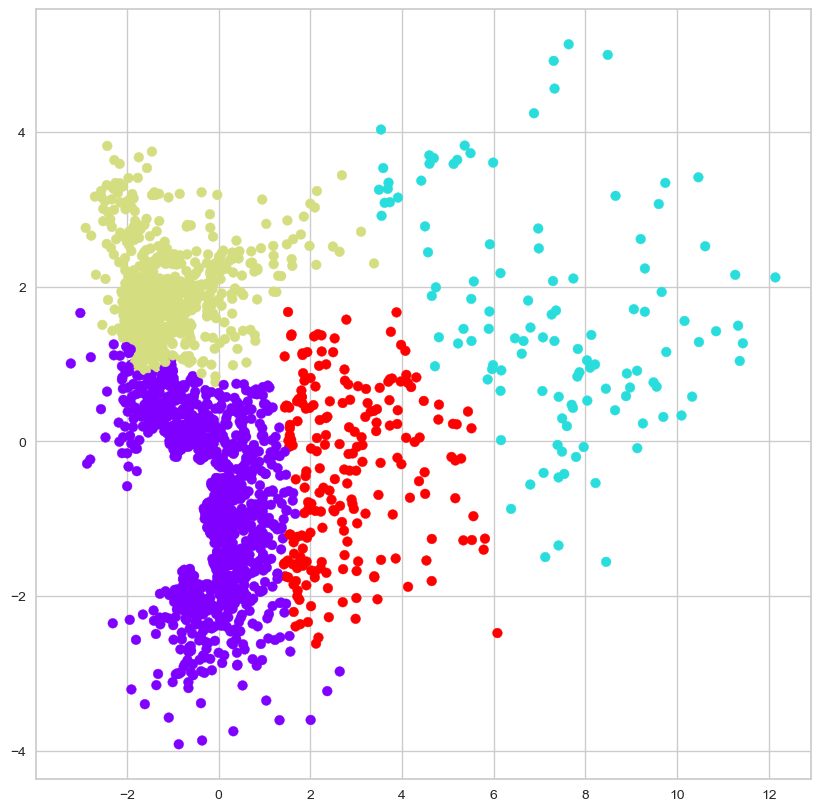

In [216]:
ac2 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(10, 10))
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac2.fit_predict(ds_pca), cmap ='rainbow')
plt.show()

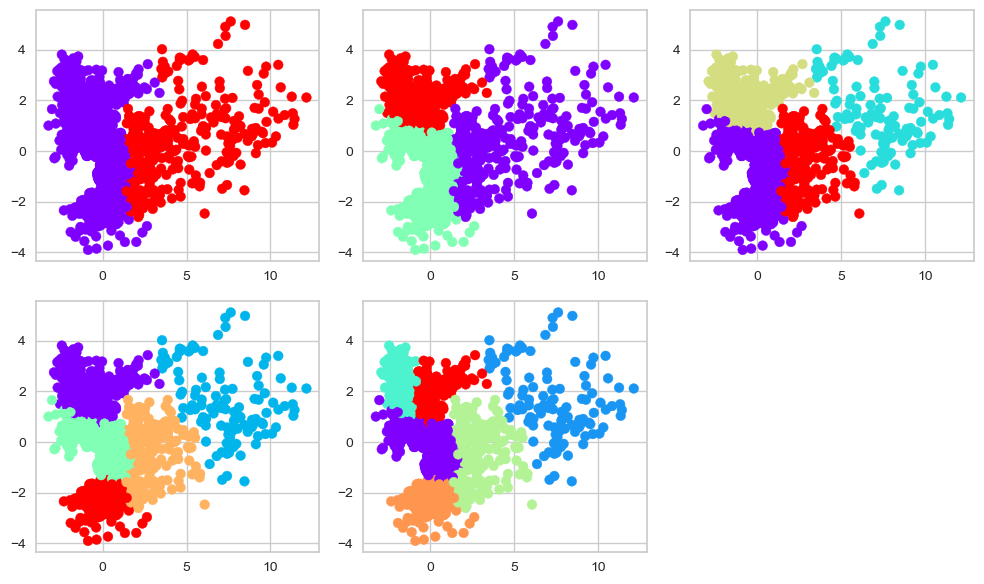

In [217]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)



plt.figure(figsize=(10, 6))


plt.subplot(2, 3, 1)
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac2.fit_predict(ds_pca), cmap ='rainbow')



plt.subplot(2, 3, 2)
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac3.fit_predict(ds_pca), cmap ='rainbow')


plt.subplot(2, 3, 3)
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac4.fit_predict(ds_pca), cmap ='rainbow')

plt.subplot(2, 3, 4)
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac5.fit_predict(ds_pca), cmap ='rainbow')

plt.subplot(2, 3, 5)
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = ac6.fit_predict(ds_pca), cmap ='rainbow')

plt.tight_layout()
plt.show()

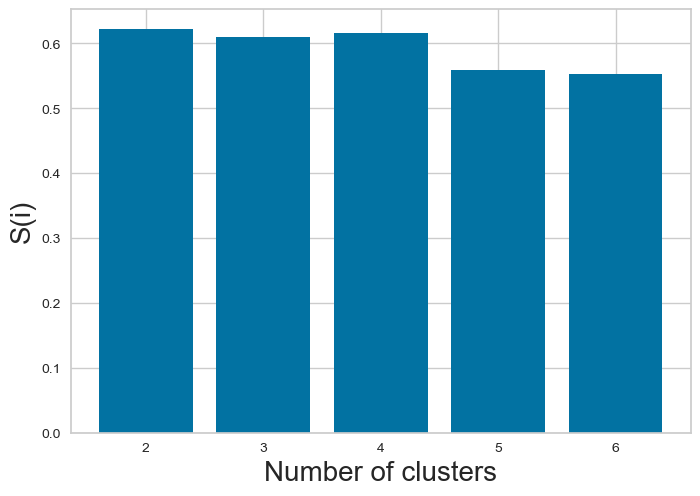

In [218]:
k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(ds_pca, ac2.fit_predict(ds_pca)))
silhouette_scores.append(
        silhouette_score(ds_pca, ac3.fit_predict(ds_pca)))
silhouette_scores.append(
        silhouette_score(ds_pca, ac4.fit_predict(ds_pca)))
silhouette_scores.append(
        silhouette_score(ds_pca, ac5.fit_predict(ds_pca)))
silhouette_scores.append(
        silhouette_score(ds_pca, ac6.fit_predict(ds_pca)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [226]:
# Создаем объект AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4)

# Производим кластеризацию
clusters = clustering.fit_predict(ds_pca)
clusters

array([2, 0, 0, ..., 0, 3, 3], dtype=int64)

In [227]:
df_old['agglo_cluster'] = clusters
df_old

,federal_district_short,region_name,id,name_short,agglo_cluster
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,2
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0
5,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,2
9,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,0
...,...,...,...,...,...
2558,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0
2561,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов...",3


(array([1009.,    0.,    0.,  116.,    0.,    0.,  618.,    0.,    0.,
         210.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

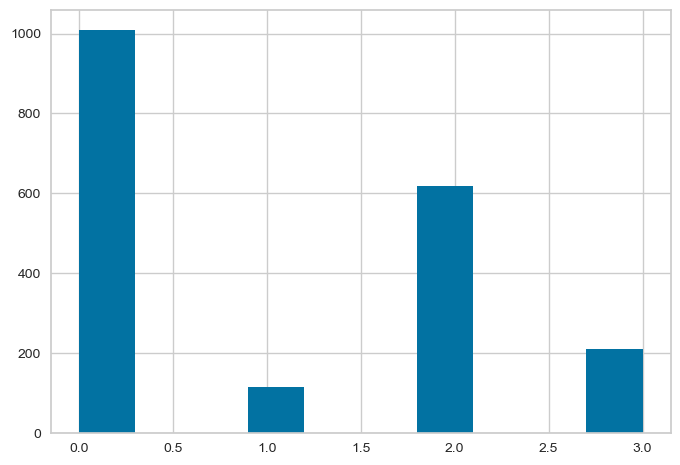

In [228]:
plt.hist(df_old['agglo_cluster'])

(array([136.,   0.,   0.,   0., 227.,   0.,   0.,   0., 101.,   0.,   0.,
          0., 171.,   0.,   0.,   0.,   0., 296.,   0.,   0.,   0., 442.,
          0.,   0.,   0., 101.,   0.,   0.,   0., 124.]),
 array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
        1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
        2.33333333, 2.56666667, 2.8       , 3.03333333, 3.26666667,
        3.5       , 3.73333333, 3.96666667, 4.2       , 4.43333333,
        4.66666667, 4.9       , 5.13333333, 5.36666667, 5.6       ,
        5.83333333, 6.06666667, 6.3       , 6.53333333, 6.76666667,
        7.        ]),
 <BarContainer object of 30 artists>)

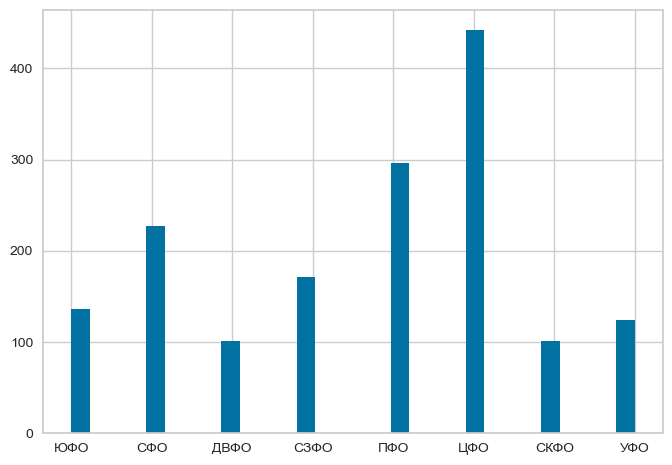

In [94]:
plt.hist(df_0['federal_district_short'], bins = 30)

In [229]:
df_0 = df_old[df_old['agglo_cluster'] == 0]
df_0

,federal_district_short,region_name,id,name_short,agglo_cluster
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0
9,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,0
11,СФО,Алтайский край,3,"ФГБОУ ВО ""Алтайский государственный технически...",0
12,СФО,Алтайский край,3,"ФГБОУ ВО ""Алтайский государственный технически...",0
...,...,...,...,...,...
2548,СЗФО,Калининградская область,113213,ГБОУ ВО «Педагогический институт»,0
2553,ЦФО,г. Москва,113232,ФГУП «ВИАМ»,0
2558,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0


In [230]:
df_0['name_short'].unique()

array(['ФГБОУ ВО «АГУ»', 'ФГБОУ ВО «АлтГПУ»',
       'ФГБОУ ВО "Алтайский государственный технический университет им. И.И. Ползунова", АлтГТУ',
       'ФГБОУ ВО «Алтайский государственный университет», Алтайский государственный университет, АлтГУ',
       'ФГБОУ ВО «Амурский государственный университет», ФГБОУ ВО «АмГУ», Амурский государственный университет, АмГУ',
       'ФГБОУ ВО «Амурский гуманитарно-педагогический государственный университет»,  ФГБОУ ВО «АмГПГУ»',
       'ФГБОУ ВО «АнГТУ»,  Ангарский  государственный технический университет',
       'ФГБОУ ВО «АГПУ»', 'Астраханский государственный университет',
       'ФГБОУ ВО «БГУ»', 'БГТУ «ВОЕНМЕХ» им. Д.Ф. Устинова',
       'ФГБОУ ВО «БГПУ им. М. Акмуллы», Башкирский государственный педагогический университет им. М. Акмуллы',
       'ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шу

In [231]:
df_1 = df_old[df_old['agglo_cluster'] == 1]
df_1

,federal_district_short,region_name,id,name_short,agglo_cluster
215,ЦФО,г. Москва,59,"МИСиС, НИТУ «МИСиС»",1
216,ЦФО,г. Москва,59,"МИСиС, НИТУ «МИСиС»",1
217,ЦФО,г. Москва,59,"МИСиС, НИТУ «МИСиС»",1
218,ЦФО,г. Москва,59,"МИСиС, НИТУ «МИСиС»",1
219,ЦФО,г. Москва,59,"МИСиС, НИТУ «МИСиС»",1
...,...,...,...,...,...
2198,ЦФО,г. Москва,1792,ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздра...,1
2199,ЦФО,г. Москва,1792,ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздра...,1
2200,ЦФО,г. Москва,1792,ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздра...,1
2201,ЦФО,г. Москва,1792,ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздра...,1


In [232]:
df_1['name_short'].unique()

array(['МИСиС, НИТУ «МИСиС»', 'ФГБОУ ВО «КНИТУ»', 'МАИ', 'РТУ МИРЭА',
       'Национальный исследовательский университет «МИЭТ»; НИУ МИЭТ; МИЭТ',
       'МГТУ им. Н.Э. Баумана', 'ФГБОУ ВО «МГТУ «СТАНКИН»', 'МФТИ',
       'ФГБОУ ВО «НИУ «МЭИ»', 'НИЯУ МИФИ',
       'ПНИПУ, ФГБОУ ВО «Пермский национальный исследовательский политехнический университет», ФГБОУ ВО «ПНИПУ»',
       'ФГАОУ ВО "РГУ нефти и газа (НИУ) имени И.М. Губкина", РГУ нефти и газа (НИУ) имени И.М. Губкина, Губкинский университет ',
       'РУДН; Российский университет дружбы народов; ФГАОУ ВО РУДН; ФГАУ ВО «Российский университет дружбы народов»',
       'Университет ИТМО, НИУ ИТМО, ИТМО', 'СПГУ, Горный университет',
       'ФГАОУ ВО СПбПУ, СПбПУ, ФГАОУ ВО «СПбПУ», Санкт-Петербургский политехнический университет Петра Великого',
       'Национальный исследовательский Томский государственный университет, Томский государственный университет, НИ ТГУ, ТГУ',
       'ФГАОУ ВО НИ ТПУ, ТПУ, Национальный исследовательский Томский

(array([61.,  5.,  5., 20.,  0., 10.,  5.,  5.,  1.,  4.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

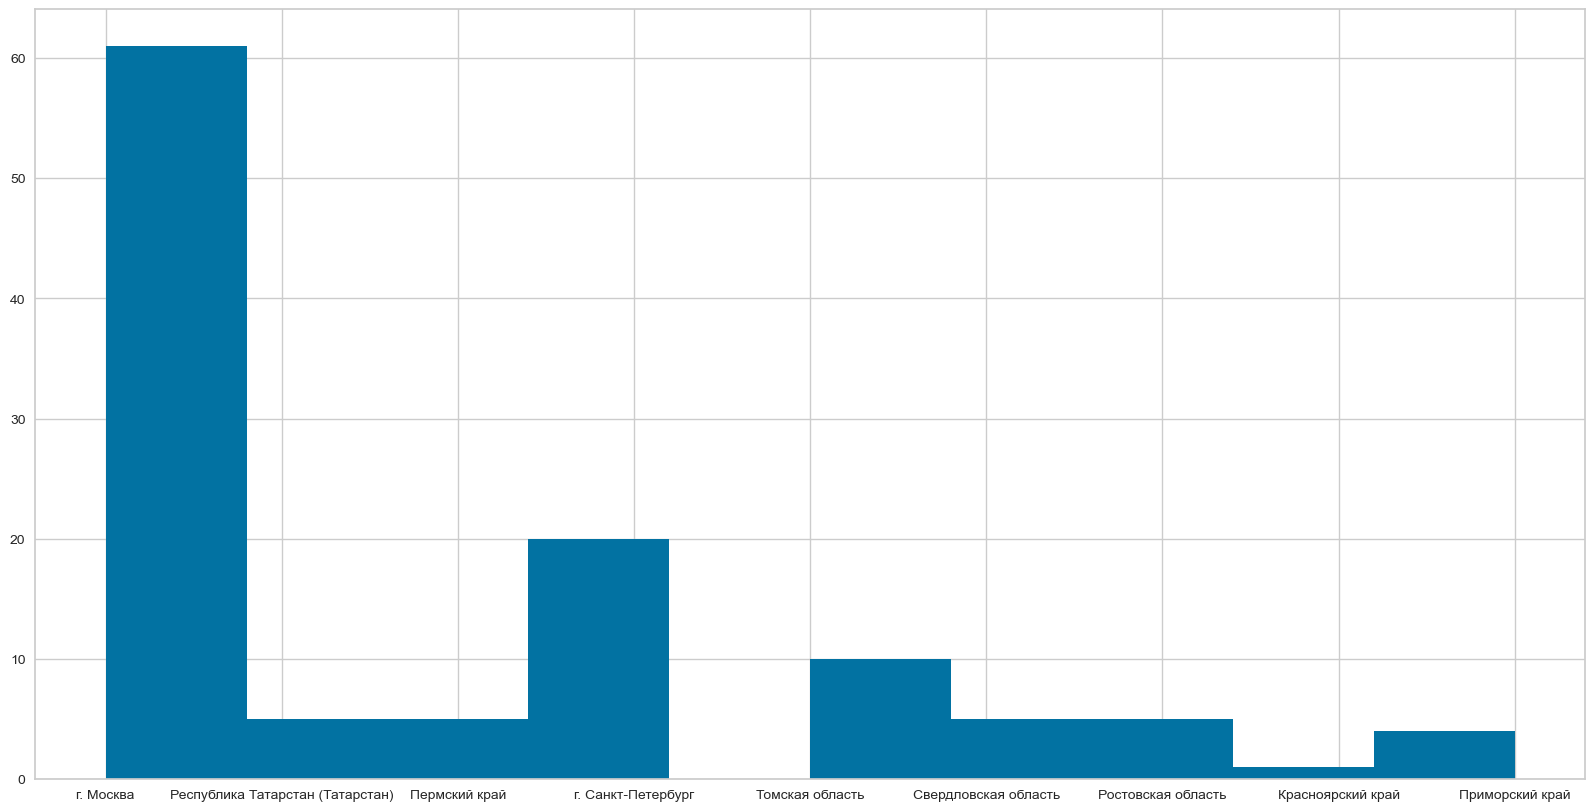

In [233]:
plt.figure(figsize = (20, 10))
plt.hist(df_1['region_name'])

In [234]:
df_2 = df_old[df_old['agglo_cluster'] == 2]
df_2

,federal_district_short,region_name,id,name_short,agglo_cluster
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,2
5,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,2
10,СФО,Алтайский край,3,"ФГБОУ ВО ""Алтайский государственный технически...",2
15,СФО,Алтайский край,4,ФГБОУ ВО «Алтайский государственный университе...,2
20,ДВФО,Амурская область,5,ФГБОУ ВО «Амурский государственный университет...,2
...,...,...,...,...,...
2537,ПФО,Самарская область,110740,МБОУ ВПО ТК,2
2541,ЦФО,г. Москва,111029,Академия акварели и изящных искусств,2
2542,ЦФО,г. Москва,111029,Академия акварели и изящных искусств,2
2543,ЦФО,г. Москва,111029,Академия акварели и изящных искусств,2


In [235]:
df_2['name_short'].unique()

array(['ФГБОУ ВО «АГУ»', 'ФГБОУ ВО «АлтГПУ»',
       'ФГБОУ ВО "Алтайский государственный технический университет им. И.И. Ползунова", АлтГТУ',
       'ФГБОУ ВО «Алтайский государственный университет», Алтайский государственный университет, АлтГУ',
       'ФГБОУ ВО «Амурский государственный университет», ФГБОУ ВО «АмГУ», Амурский государственный университет, АмГУ',
       'ФГБОУ ВО «Амурский гуманитарно-педагогический государственный университет»,  ФГБОУ ВО «АмГПГУ»',
       'ФГБОУ ВО «АнГТУ»,  Ангарский  государственный технический университет',
       'ФГБОУ ВО «АГПУ»', 'Астраханский государственный университет',
       'ФГБОУ ВО «БГУ»', 'БГТУ «ВОЕНМЕХ» им. Д.Ф. Устинова',
       'ФГБОУ ВО «БГПУ им. М. Акмуллы», Башкирский государственный педагогический университет им. М. Акмуллы',
       'ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шу

(array([ 39.,  76.,  33.,   0.,  69., 105.,   0., 221.,  24.,  51.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

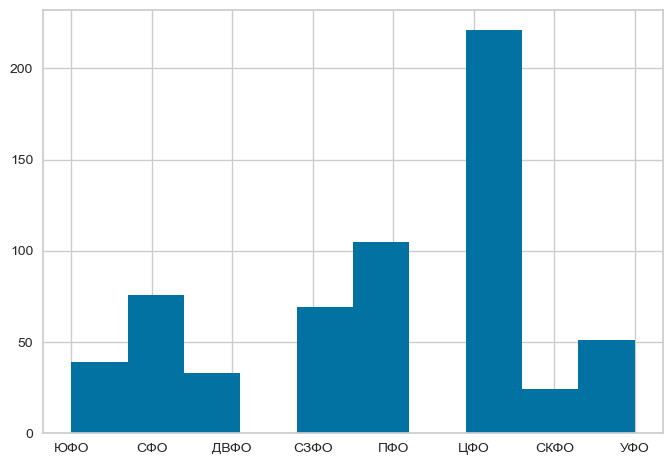

In [236]:
plt.hist(df_2['federal_district_short'])

In [237]:
df_3 = df_old[df_old['agglo_cluster'] == 3]
df_3

,federal_district_short,region_name,id,name_short,agglo_cluster
63,ПФО,Республика Башкортостан,15,ФГБОУ ВО «Башкирский государственный университ...,3
64,ПФО,Республика Башкортостан,15,ФГБОУ ВО «Башкирский государственный университ...,3
67,ЦФО,Белгородская область,16,"БГТУ им. В.Г. Шухова, Белгородский государстве...",3
68,ЦФО,Белгородская область,16,"БГТУ им. В.Г. Шухова, Белгородский государстве...",3
71,ЦФО,Белгородская область,17,ФГАОУ ВО «Белгородский государственный национ...,3
...,...,...,...,...,...
2555,ЮФО,Республика Крым,113416,Крымский федеральный университет имени В.И. Ве...,3
2556,ЮФО,Республика Крым,113416,Крымский федеральный университет имени В.И. Ве...,3
2557,ЮФО,Республика Крым,113416,Крымский федеральный университет имени В.И. Ве...,3
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов...",3


In [238]:
df_3['name_short'].unique()

array(['ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шухова',
       'ФГАОУ ВО «Белгородский государственный  национальный исследовательский университет», Белгородский государственный  национальный исследовательский университет, НИУ "БелГУ"',
       'ФГБОУ ВО «Волгоградский государственный технический университет», Волгоградский государственный технический университет, ВолгГТУ',
       'ФГБОУ ВО «Воронежский государственный технический университет», Воронежский государственный технический университет, ФГБОУ ВО «ВГТУ», ВГТУ',
       'ФГБОУ ВПО «ВГУ»',
       'Донской государственный технический университет, ДГТУ',
       'ФГБОУ ВО «ИжГТУ имени М.Т. Калашникова»',
       'ФГБОУ ВО «ИРНИТУ», ИРНИТУ',
       'ФГБОУ ВО «ИГУ», ИГУ, Иркутский государственный университет',
       'КНИТУ-КАИ, ФГБОУ ВО «КНИТУ-КАИ», Казанский национальный исследоват

(array([43., 87., 10.,  0., 21., 13.,  0., 28.,  3.,  5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

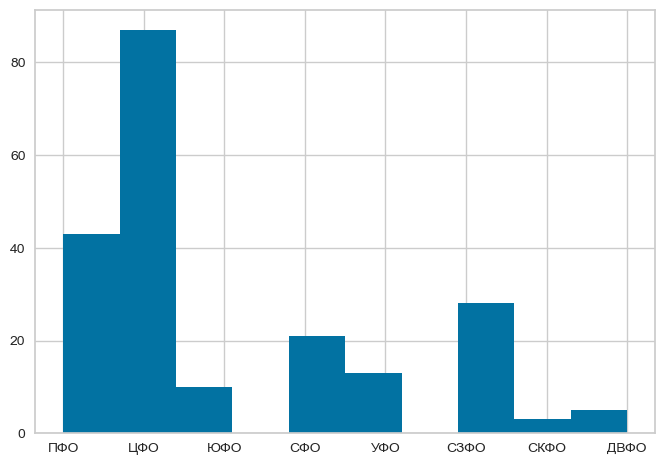

In [239]:
plt.hist(df_3['federal_district_short'])

# Выводы по аггломеративной кластеризации

Кластер 0 - региональные вузы

Кластер 1 - Московские топовые вузы

Кластер 2 - региональные и узконаправленные московские вузы

Кластер 3 - высокорейтингговые региональные и хорошие московские и петербургские вузы

# Kmeans

In [106]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

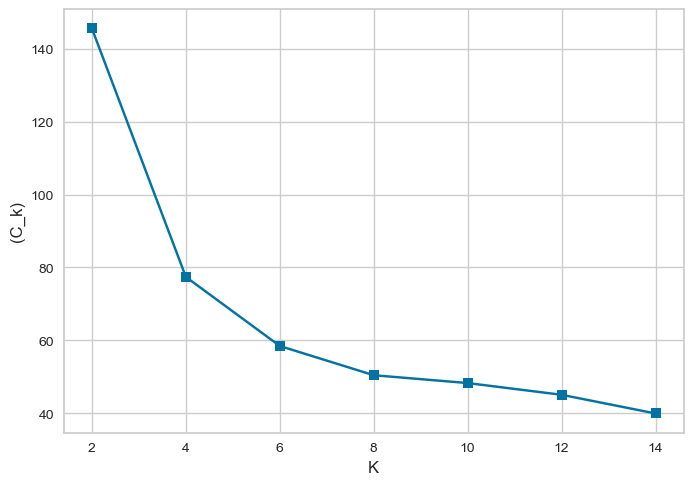

In [240]:
inertia = []
for k in range(2,15,2):
    mbk = MiniBatchKMeans(n_clusters=k, init='random', random_state=1).fit(ds_pca)
    inertia.append(np.sqrt(mbk.inertia_))
plt.plot(range(2,15,2),inertia,marker='s')
plt.xlabel('K')
plt.ylabel('(C_k)')
plt.show()

In [241]:
kmeans = KMeans(n_clusters=4, random_state=0) 

clusters = kmeans.fit_predict(ds_pca)
clusters


array([2, 0, 0, ..., 0, 1, 1])

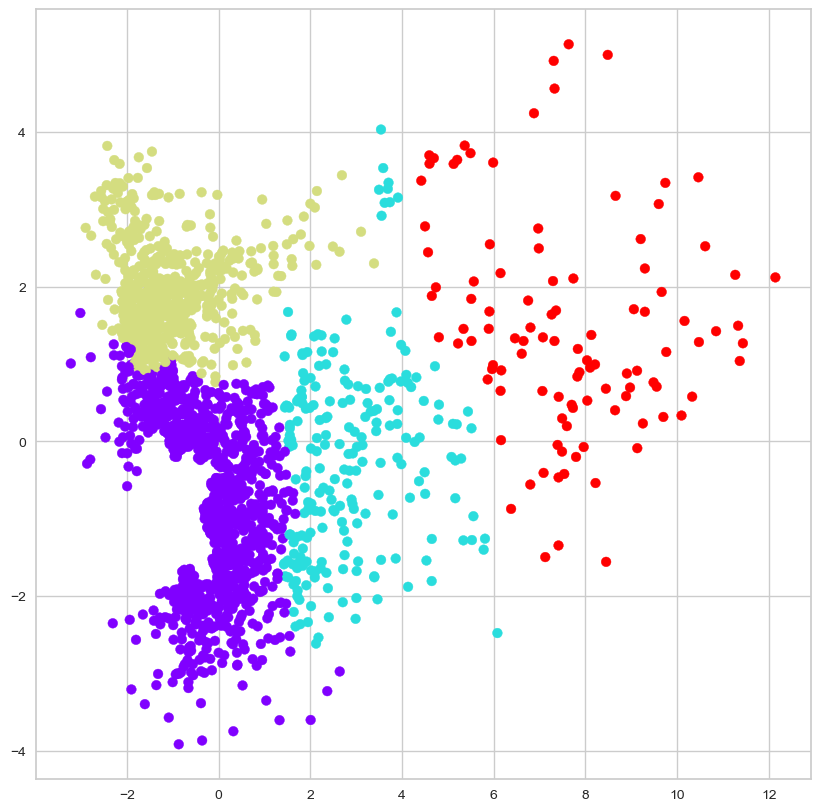

In [242]:
kmeans = KMeans(n_clusters=4, random_state=0) 
plt.figure(figsize =(10, 10))
plt.scatter(ds_pca['P1'], ds_pca['P2'], 
           c = kmeans.fit_predict(ds_pca), cmap ='rainbow')
plt.show()

In [243]:
df_old['Kmeans_cluster'] = clusters
df_old

,federal_district_short,region_name,id,name_short,agglo_cluster,Kmeans_cluster
0,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,2,2
3,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0,0
4,ЮФО,Республика Адыгея (Адыгея),1,ФГБОУ ВО «АГУ»,0,0
5,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,2,2
9,СФО,Алтайский край,2,ФГБОУ ВО «АлтГПУ»,0,0
...,...,...,...,...,...,...
2558,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,0
2560,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,0
2561,ЮФО,г. Севастополь,113437,ФГАОУ ВО «Севастопольский государственный унив...,0,0
2562,ЦФО,г. Москва,120111,"Московский политехнический университет, Москов...",3,1


(array([1009.,    0.,    0.,  220.,    0.,    0.,  618.,    0.,    0.,
         106.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

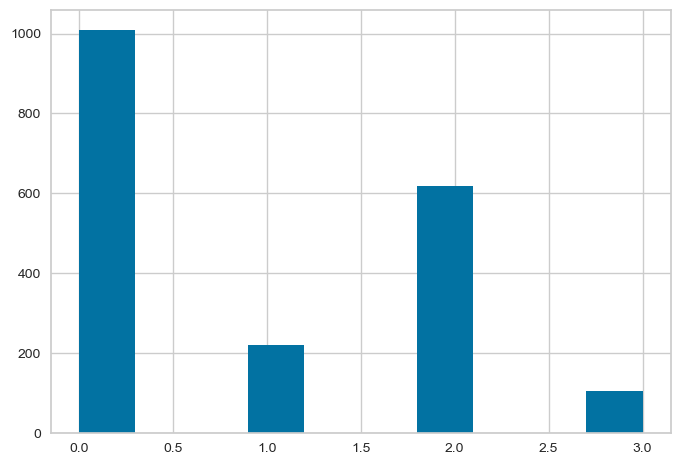

In [244]:
plt.hist(df_old['Kmeans_cluster'])

In [245]:
df_0 = df_old[df_old['Kmeans_cluster'] == 0]
df_0['name_short'].unique()

array(['ФГБОУ ВО «АГУ»', 'ФГБОУ ВО «АлтГПУ»',
       'ФГБОУ ВО "Алтайский государственный технический университет им. И.И. Ползунова", АлтГТУ',
       'ФГБОУ ВО «Алтайский государственный университет», Алтайский государственный университет, АлтГУ',
       'ФГБОУ ВО «Амурский государственный университет», ФГБОУ ВО «АмГУ», Амурский государственный университет, АмГУ',
       'ФГБОУ ВО «Амурский гуманитарно-педагогический государственный университет»,  ФГБОУ ВО «АмГПГУ»',
       'ФГБОУ ВО «АнГТУ»,  Ангарский  государственный технический университет',
       'ФГБОУ ВО «АГПУ»', 'Астраханский государственный университет',
       'ФГБОУ ВО «БГУ»', 'БГТУ «ВОЕНМЕХ» им. Д.Ф. Устинова',
       'ФГБОУ ВО «БГПУ им. М. Акмуллы», Башкирский государственный педагогический университет им. М. Акмуллы',
       'ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шу

In [247]:
df_1 = df_old[df_old['Kmeans_cluster'] == 1]
df_1['name_short'].unique()

array(['ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шухова',
       'ФГАОУ ВО «Белгородский государственный  национальный исследовательский университет», Белгородский государственный  национальный исследовательский университет, НИУ "БелГУ"',
       'ФГБОУ ВО «Волгоградский государственный технический университет», Волгоградский государственный технический университет, ВолгГТУ',
       'ФГБОУ ВО «Воронежский государственный технический университет», Воронежский государственный технический университет, ФГБОУ ВО «ВГТУ», ВГТУ',
       'ФГБОУ ВПО «ВГУ»',
       'Донской государственный технический университет, ДГТУ',
       'ФГБОУ ВО «ИжГТУ имени М.Т. Калашникова»',
       'ФГБОУ ВО «ИРНИТУ», ИРНИТУ',
       'ФГБОУ ВО «ИГУ», ИГУ, Иркутский государственный университет',
       'КНИТУ-КАИ, ФГБОУ ВО «КНИТУ-КАИ», Казанский национальный исследоват

In [126]:
df_2 = df_old[df_old['Kmeans_cluster'] == 2]
df_2['name_short'].unique()

array(['ФГБОУ ВО «АГУ»', 'ФГБОУ ВО «АлтГПУ»',
       'ФГБОУ ВО "Алтайский государственный технический университет им. И.И. Ползунова", АлтГТУ',
       'ФГБОУ ВО «Алтайский государственный университет», Алтайский государственный университет, АлтГУ',
       'ФГБОУ ВО «Амурский государственный университет», ФГБОУ ВО «АмГУ», Амурский государственный университет, АмГУ',
       'ФГБОУ ВО «Амурский гуманитарно-педагогический государственный университет»,  ФГБОУ ВО «АмГПГУ»',
       'ФГБОУ ВО «АнГТУ»,  Ангарский  государственный технический университет',
       'ФГБОУ ВО «АГПУ»', 'Астраханский государственный университет',
       'ФГБОУ ВО «БГУ»', 'БГТУ «ВОЕНМЕХ» им. Д.Ф. Устинова',
       'ФГБОУ ВО «БГПУ им. М. Акмуллы», Башкирский государственный педагогический университет им. М. Акмуллы',
       'ФГБОУ ВО «Башкирский государственный университет», Башкирский государственный университет, БашГУ',
       'БГТУ им. В.Г. Шухова, Белгородский государственный технологический университет им. В.Г. Шу

In [248]:
df_3 = df_old[df_old['Kmeans_cluster'] == 3]
df_3['name_short'].unique()

array(['МИСиС, НИТУ «МИСиС»', 'ФГБОУ ВО «КНИТУ»', 'МАИ', 'РТУ МИРЭА',
       'Национальный исследовательский университет «МИЭТ»; НИУ МИЭТ; МИЭТ',
       'МГТУ им. Н.Э. Баумана', 'ФГБОУ ВО «МГТУ «СТАНКИН»', 'МФТИ',
       'ФГБОУ ВО «НИУ «МЭИ»', 'НИЯУ МИФИ',
       'ПНИПУ, ФГБОУ ВО «Пермский национальный исследовательский политехнический университет», ФГБОУ ВО «ПНИПУ»',
       'ФГАОУ ВО "РГУ нефти и газа (НИУ) имени И.М. Губкина", РГУ нефти и газа (НИУ) имени И.М. Губкина, Губкинский университет ',
       'РУДН; Российский университет дружбы народов; ФГАОУ ВО РУДН; ФГАУ ВО «Российский университет дружбы народов»',
       'Университет ИТМО, НИУ ИТМО, ИТМО', 'СПГУ, Горный университет',
       'ФГАОУ ВО СПбПУ, СПбПУ, ФГАОУ ВО «СПбПУ», Санкт-Петербургский политехнический университет Петра Великого',
       'Национальный исследовательский Томский государственный университет, Томский государственный университет, НИ ТГУ, ТГУ',
       'ФГАОУ ВО НИ ТПУ, ТПУ, Национальный исследовательский Томский

# Выводы по K-means

K-means кластеризует точнее, нежели agglomerative clustering

в 1 и 2 кластерах преобладают региональные вузы и практически отсутствуют московские

в 0 кластере смесь региональных и московских вузов

в 3 кластере топовые (в основном московские) вузы
